<a href="https://colab.research.google.com/github/mads9797/Random-Forest-tutorial-2/blob/main/Tutorial_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
!pip install plotly.express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 32.3 MB/s eta 0:00:0031m33.0 MB/s eta 0:00:01
Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.8 MB)
Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)


In [ ]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint


In [ ]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint

# importing the classes where DT is implemented
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree


In [ ]:
# importing Drugs dataset -
# You may need to download this file from KEATS and upload to the Jupyter notebook dashboard and change file path
drugs = pd.read_csv('/content/drive/MyDrive/drug200.csv', sep=',')
drugs.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [ ]:
drugs.shape

(200, 6)

In [ ]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# check categorical features
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# What columns need encoding
drugs.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex          200 non-null    object
 1   BP           200 non-null    object
 2   Cholesterol  200 non-null    object
 3   Drug         200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
drugs.describe(include='O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


# this is telling you the non numerical values

In [ ]:
drugs.Drug.value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


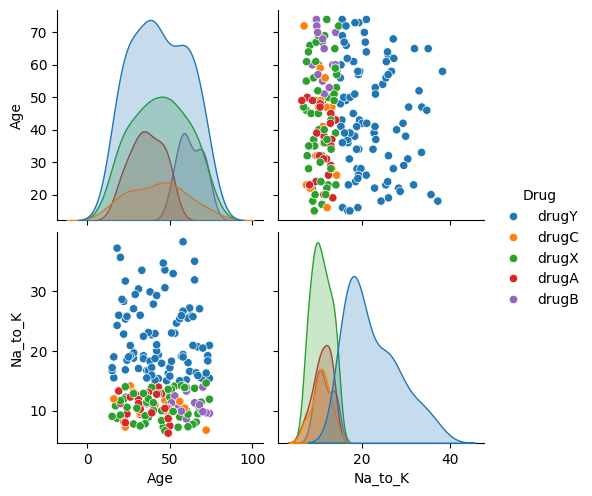

In [ ]:
# feature correlation plot
sns.pairplot(data=drugs, hue='Drug')

In [ ]:
print(drugs.BP.value_counts())

label_enc = LabelEncoder()
print(drugs['BP'].head(10))
label_enc.fit_transform(drugs['BP'])
#i want to convert categorical to numerical and now you want to plot it. showing me the first 10.

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
0      HIGH
1       LOW
2       LOW
3    NORMAL
4       LOW
5    NORMAL
6    NORMAL
7       LOW
8    NORMAL
9       LOW
Name: BP, dtype: object


array([0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2,
       2, 1])

In [ ]:
#drugs['BP'] = label_enc.fit_transform(drugs['BP'])

#sns.pairplot(data=drugs, hue='Drug')

In [ ]:
# encoding categorical values to numeric
# initiating the class
label_enc = LabelEncoder()

# columns that are categorical
cols = drugs.select_dtypes(include='O').columns #selecting ALL categorical to
# convert ALL into numeical

# looping on each column in the dataset
for col in cols:
    # Label encoding each column
    drugs[col] = label_enc.fit_transform(drugs[col])

# displaying the data after encoding
drugs.head(5)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


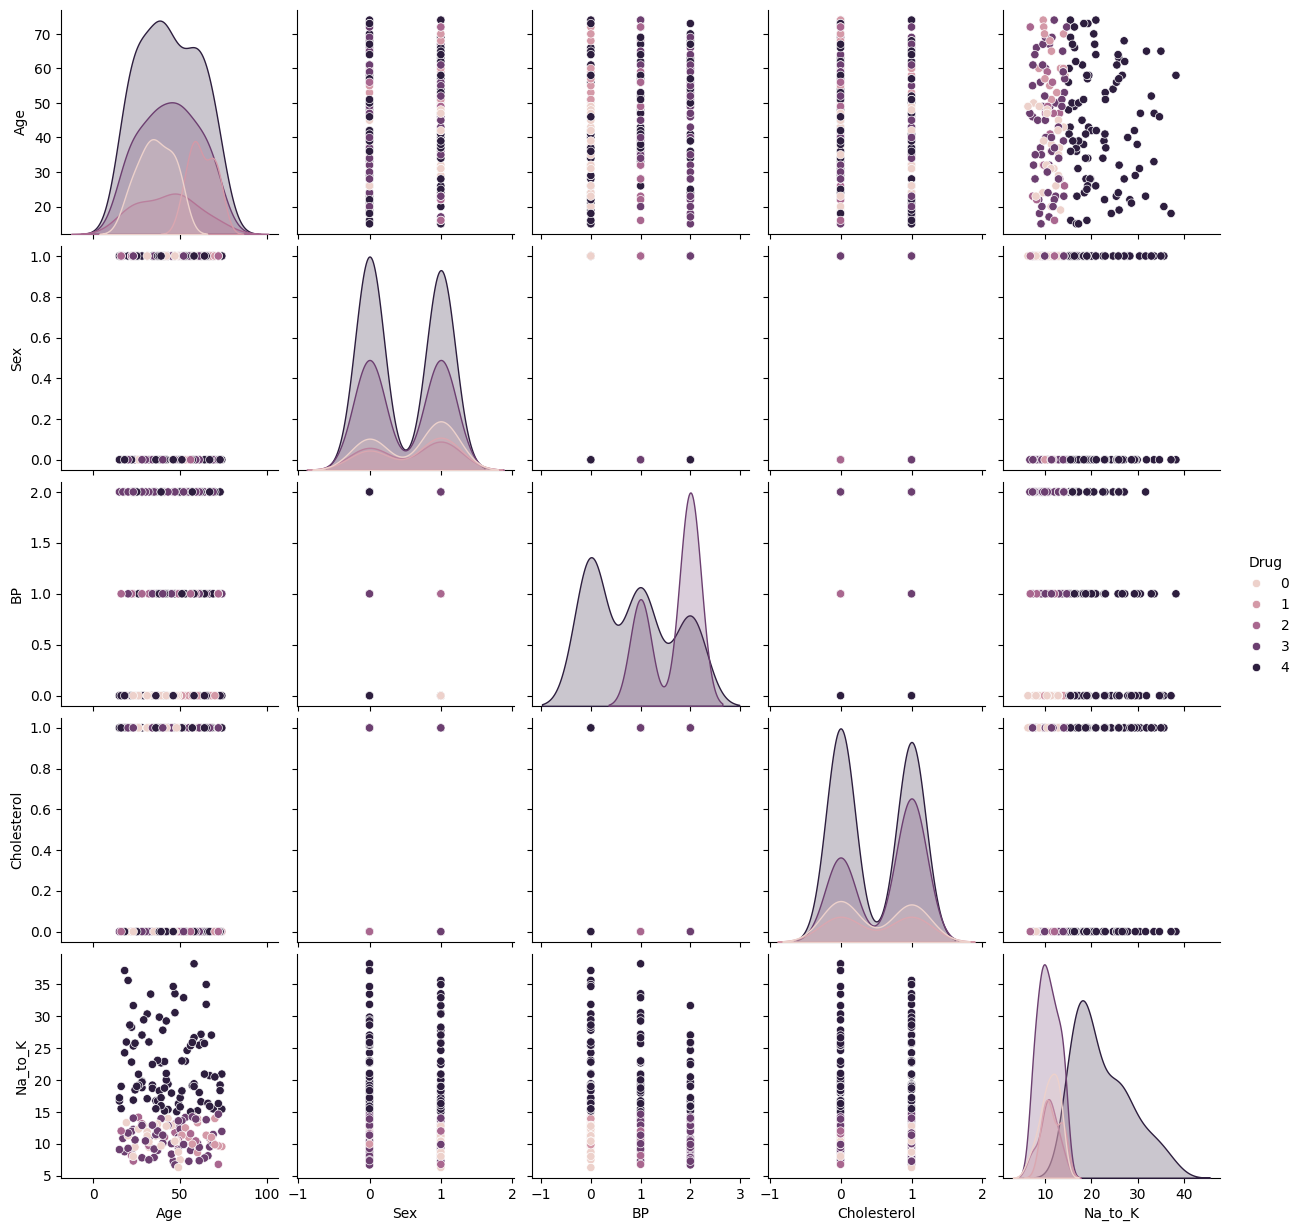

In [ ]:
sns.pairplot(data=drugs, hue='Drug')

In [ ]:
drugs.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


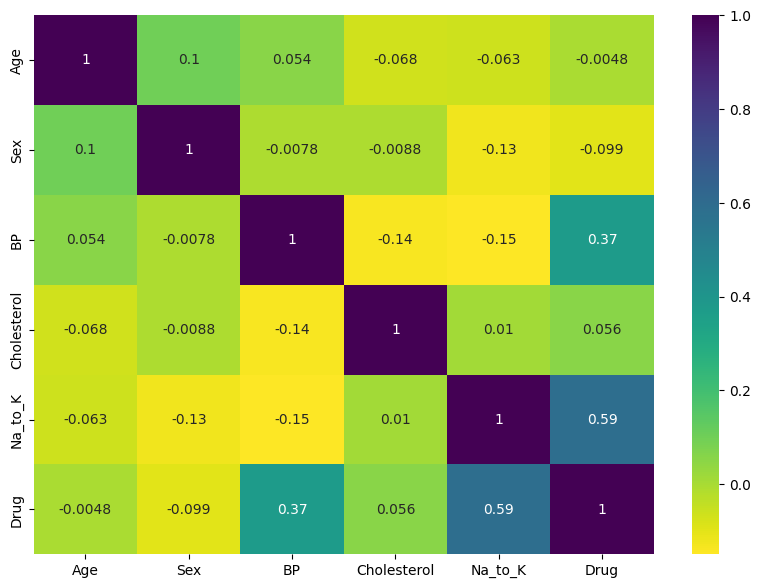

In [ ]:
# calculate correlation between features by creating heatmap
#  -1 signifies zero correlation, while 1 signifies a perfect correlation.

correlation = drugs.corr()

plt.figure(figsize=(10,7))
corr_map = sns.heatmap(correlation, annot=True, cmap="viridis_r")


<Axes: >

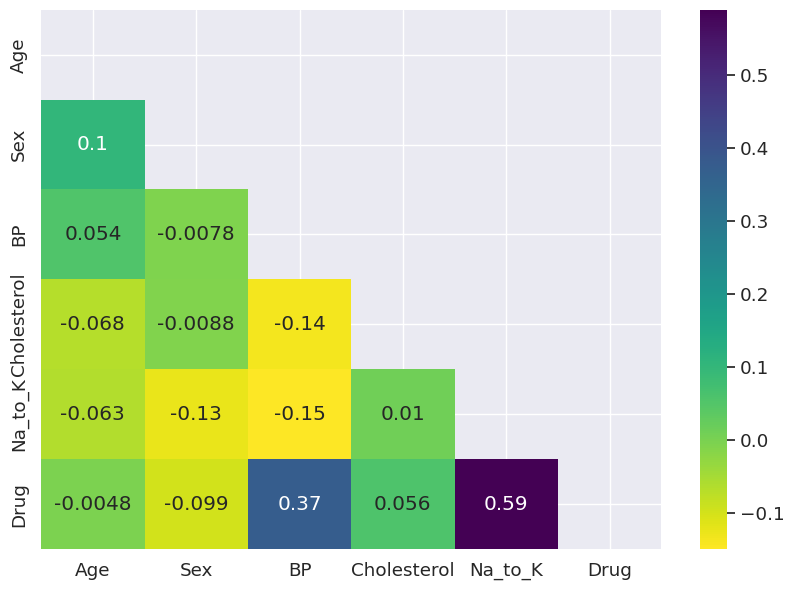

In [ ]:
mask_up = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(10,7))
sns.heatmap(correlation, cmap='viridis_r', mask=mask_up, annot=True)
#this shows same thing but only half



In [ ]:
drugs.Drug.value_counts()

,count
Drug,
4,91
3,54
0,23
2,16
1,16


In [ ]:
# count null values in each feature (this shows there are no missing values)
#  0 means = ZERO missing values
drugs.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
# If need to select features

# Get the absolute value of the correlation
cor_target = abs(correlation["Drug"])

# Select highly correlated features (thresold = 0.99)
relevant_features = cor_target[cor_target>0.25]

print(relevant_features)

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Display the results
pprint.pprint(names)

BP         0.372868
Na_to_K    0.589120
Drug       1.000000
Name: Drug, dtype: float64
['BP', 'Na_to_K', 'Drug']


In [ ]:
# dividing the data into X, y
# X: the features
# y : the target

X = drugs.drop(columns='Drug')
y = drugs['Drug']

display(X.head(3), y.head(3))

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114


,Drug
0,4
1,2
2,2


In [ ]:
# If need to rescale the numeric data

def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std

    return X

In [ ]:
#X = scale(X)
X.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114


use supervised learning to do stratified sampling

In [ ]:
###############################################
# split the data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)


In [ ]:
# Decision Trees
# Building the model
tree_clf0 = DTC()
# Fitting the model
tree_clf0.fit(X_train,y_train)

DecisionTreeClassifier()

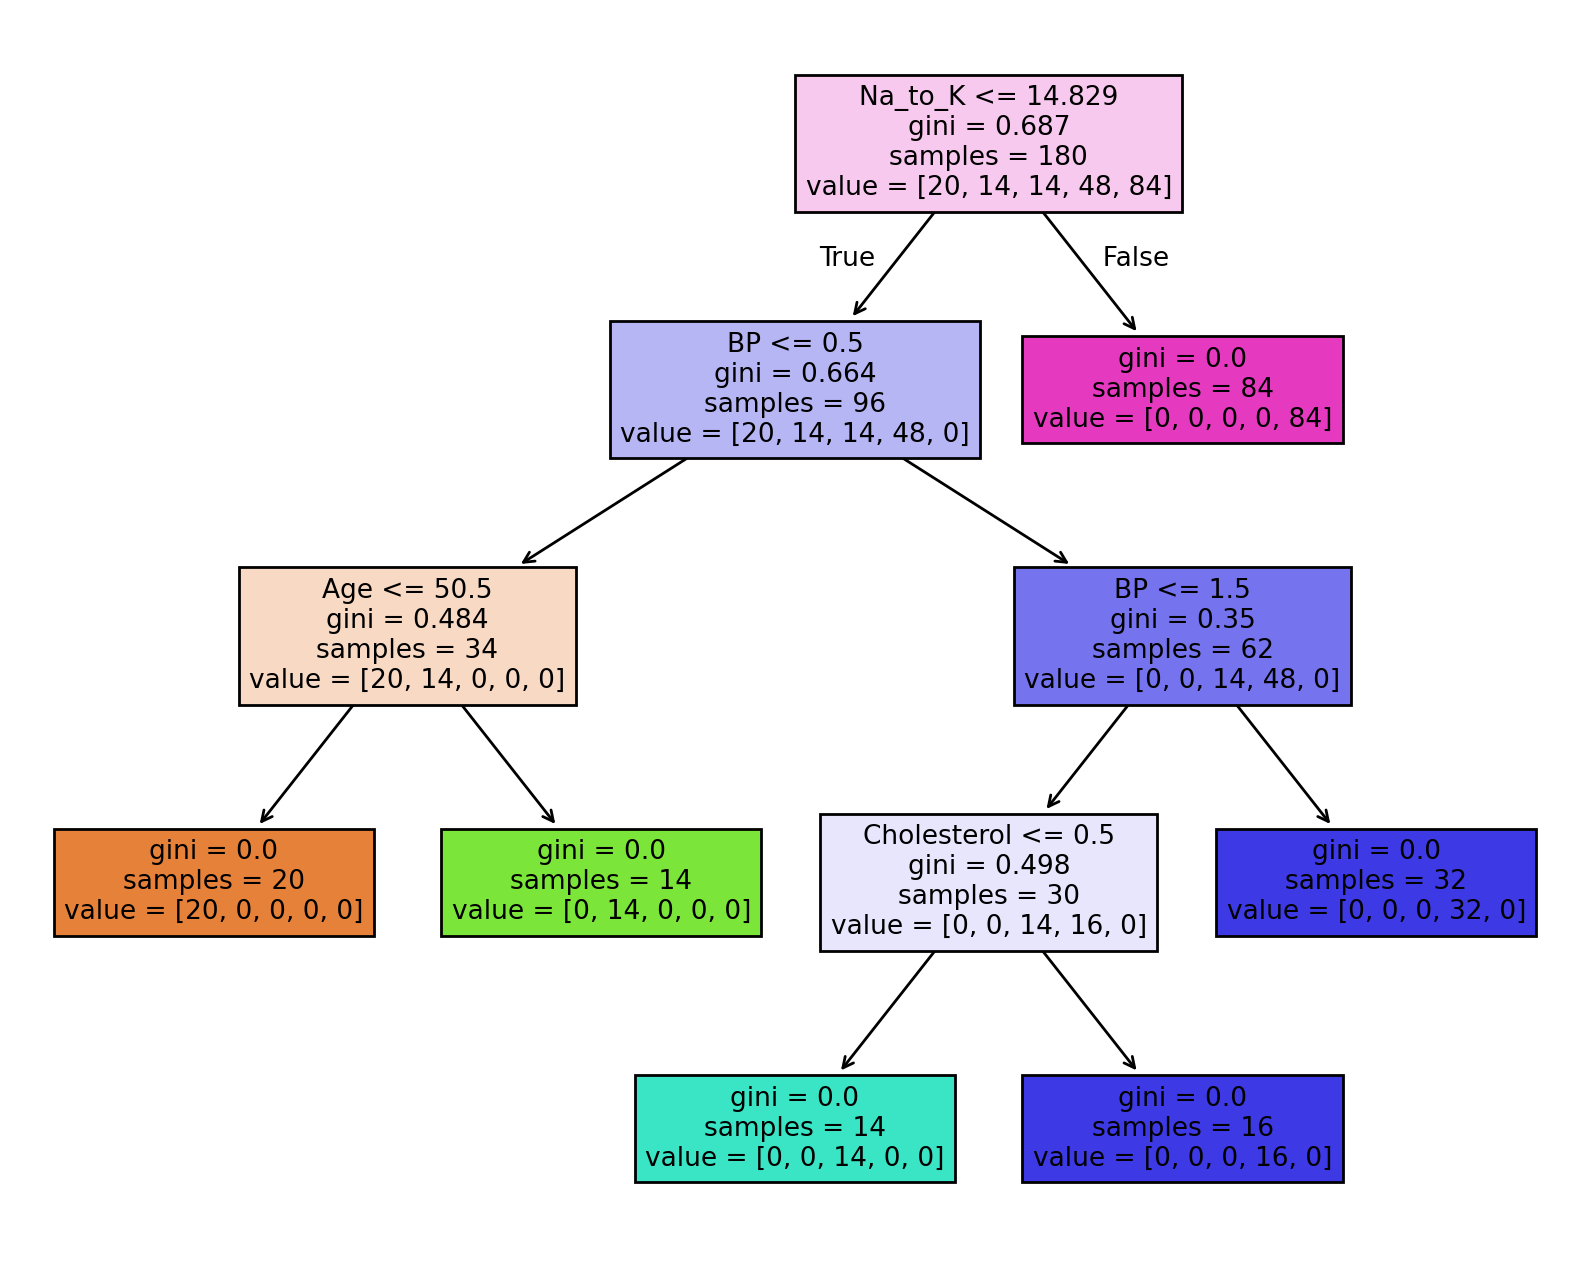

In [ ]:
# visualsing the Decision Tree

plt.figure(figsize=(10, 8), dpi=200)
plot_tree(tree_clf0, feature_names=drugs.columns, filled=True);


In [ ]:
# depth of the tree
tree_clf0.get_depth()

4

In [ ]:
# n of leaves (only counts the ones with gini =0 as they can not be split further)
tree_clf0.get_n_leaves()

6

In [ ]:
# features ✨
features = tree_clf0.feature_names_in_
features

array(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype=object)

In [ ]:
# features importance ✨
importance = tree_clf0.feature_importances_
importance

array([0.13325719, 0.        , 0.26169966, 0.12081985, 0.4842233 ])

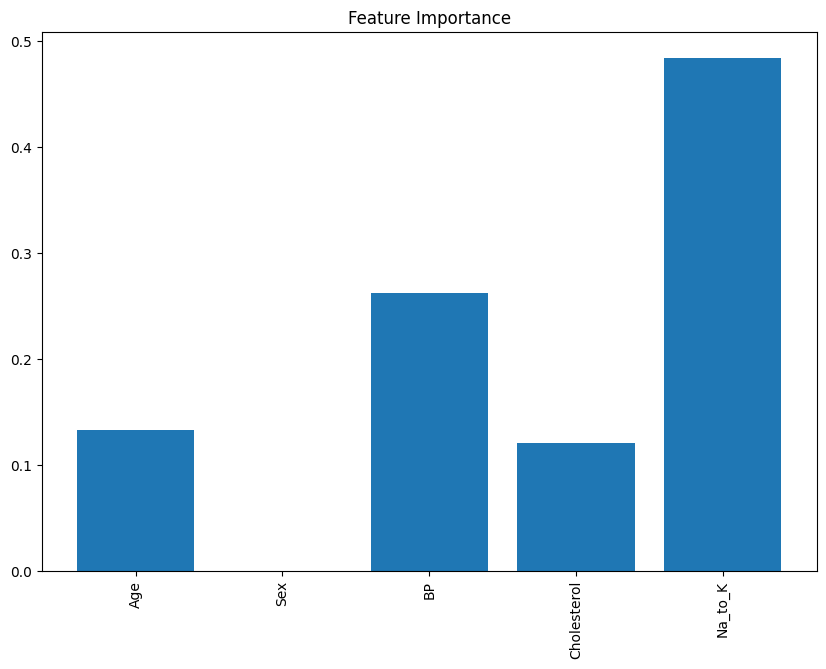

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xticks(rotation=90);

In [ ]:
tree_clf0.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:

# the model score (accuracy) on the training set
tree_clf0.score(X_train, y_train)

1.0

In [ ]:
# the model score (accuracy) on the test set
tree_clf0.score(X_test, y_test)

1.0

In [ ]:
# another way of calculating the accuracy
y_pred = tree_clf0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [ ]:
# third way using more than one metric
report = classification_report(y_test, y_pred)
print(report)

NameError: name 'y_pred' is not defined

In [ ]:
# train the decision tree model with post-pruning

path = tree_clf0.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
models = []

for i, ccp_alpha in enumerate(ccp_alphas):
    model = DTC(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    print(f"Accuracy with pruning #{i+1}:", model.score(X_test, y_test))
    models.append(model)

Accuracy with pruning #1: 1.0
Accuracy with pruning #2: 0.9
Accuracy with pruning #3: 0.8
Accuracy with pruning #4: 0.65
Accuracy with pruning #5: 0.35


Model 0


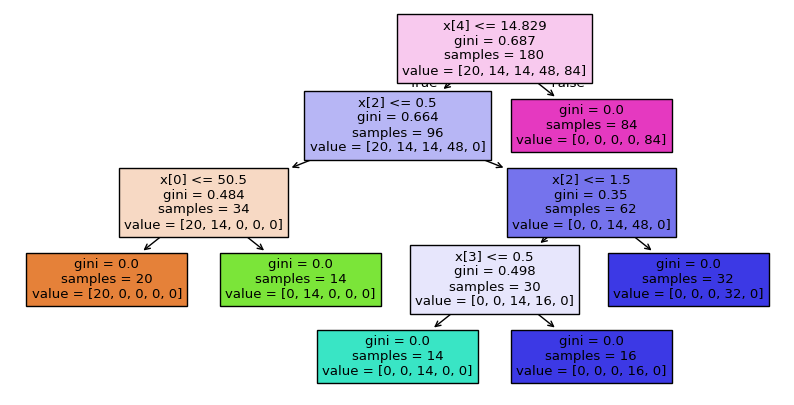

Model 1


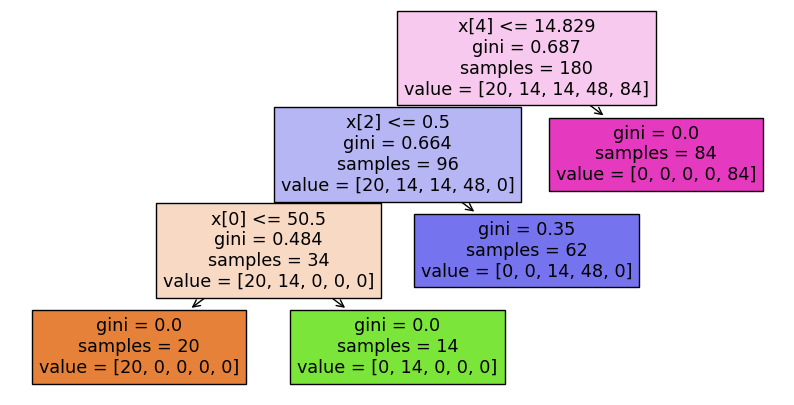

Model 2


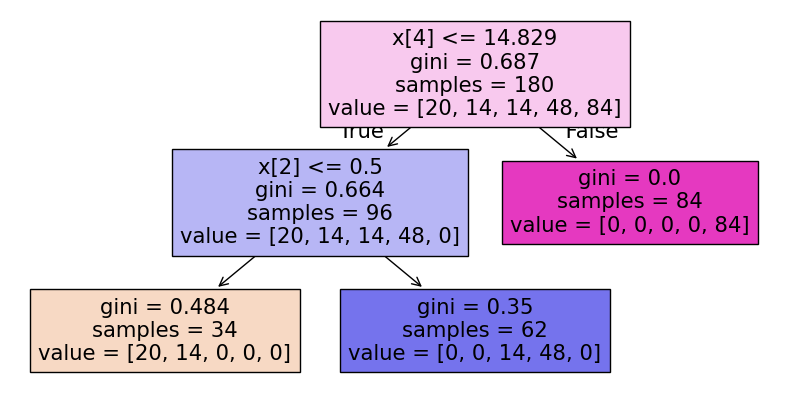

Model 3


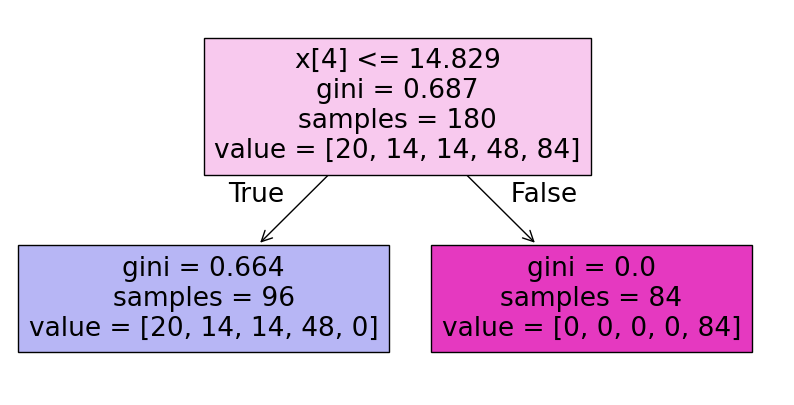

Model 4


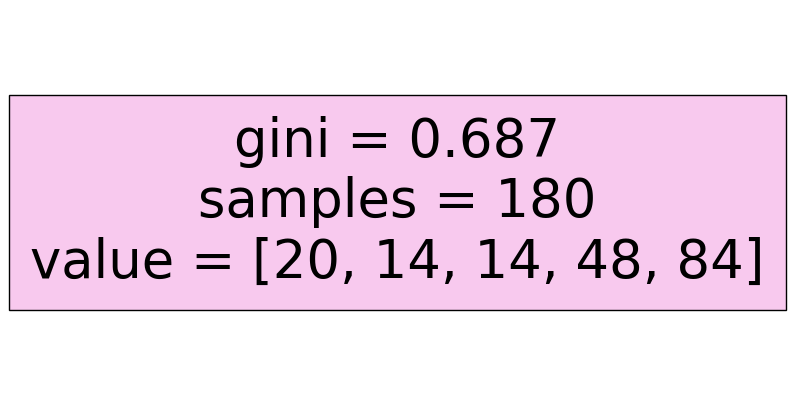

In [ ]:
# visualize the pruned decision tree

choosen_models = [0, 1, 2, 3, 4]

for m in choosen_models:
    plt.figure(figsize=(10, 5))
    print(f"Model {m}")
    plot_tree(models[m], filled=True)
    plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

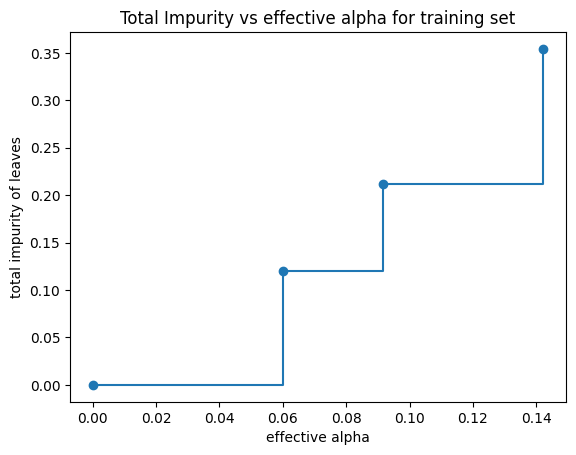

In [ ]:
path = tree_clf0.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

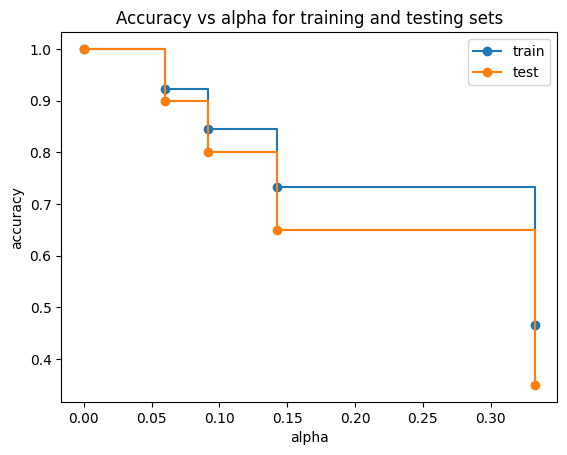

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in models]
test_scores = [clf.score(X_test, y_test) for clf in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
tree_clf1 = DTC(ccp_alpha=0.10)

# fitting the model
tree_clf1.fit(X_train, y_train)

# train acc, test acc
print(tree_clf1.score(X_train, y_train), tree_clf1.score(X_test, y_test))

# cross val score
cv_scores = cross_val_score(tree_clf1, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


0.8444444444444444 0.8
Cross-Validation Scores: [0.86111111 0.83333333 0.83333333 0.83333333 0.86111111]
Mean CV Score: 0.8444444444444447


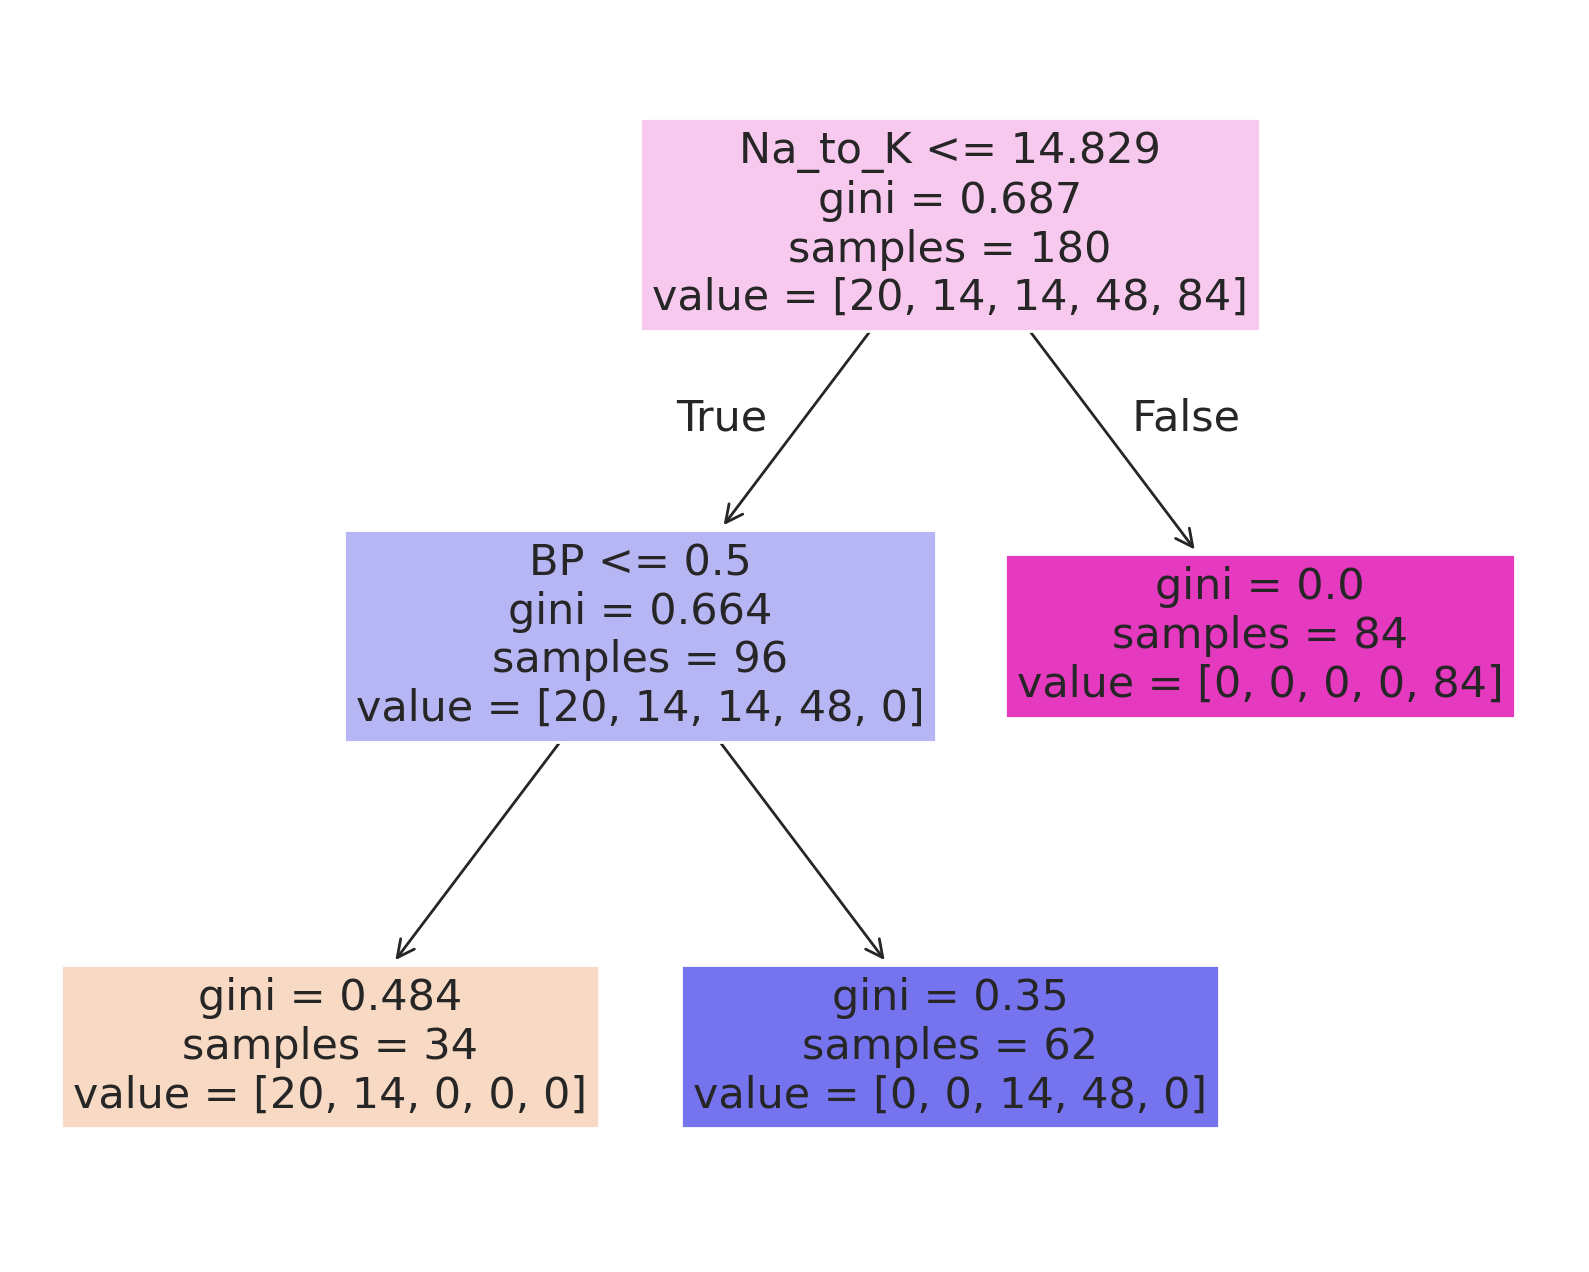

In [ ]:
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(tree_clf1, feature_names=drugs.columns, filled=True);

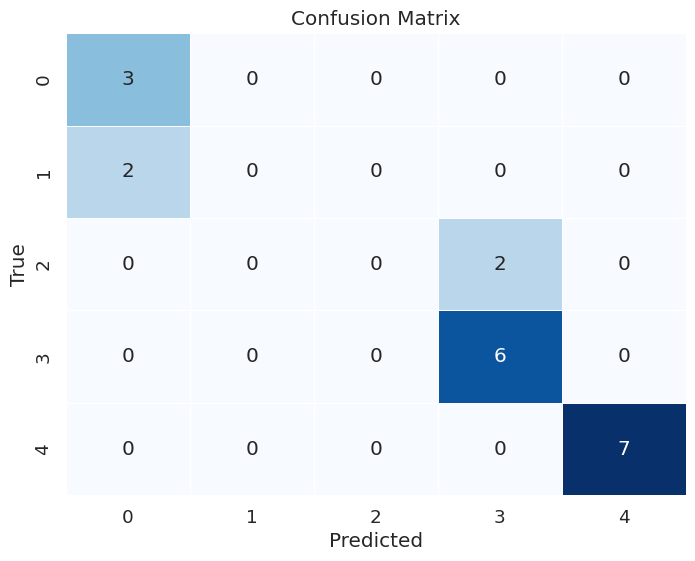

In [ ]:
from sklearn.metrics import confusion_matrix

# accuracy report
y_pred = tree_clf1.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size as needed
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Random forest


*  **Random Forest for Classification**



In [ ]:
# Implement Random Forest for Classification

# import package for random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
# after spliting data into training and testing sets, see the code in decision trees

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=30, random_state=20)


In [ ]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

report = classification_report(y_test, y_pred)
print(report)



1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20




*   **Random Forest for Regression**



In [ ]:
# Implement Random Forest for Regression

# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# after spliting data into training and testing sets, see the code in decision trees

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=30, random_state=20)


In [ ]:
# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print results
print(mse)
print(r2)


0.0
1.0


# Excercise

* Predict whether the individual had heart disease using Random Forest.

In [103]:
# importing Heart2020 dataset + specific change file path
heart = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv', sep=',')
heart.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [83]:
heart.shape

(319795, 18)

In [84]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [85]:
# check categorical features
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [86]:
# What columns need encoding
heart.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  object
 1   Smoking           319795 non-null  object
 2   AlcoholDrinking   319795 non-null  object
 3   Stroke            319795 non-null  object
 4   DiffWalking       319795 non-null  object
 5   Sex               319795 non-null  object
 6   AgeCategory       319795 non-null  object
 7   Race              319795 non-null  object
 8   Diabetic          319795 non-null  object
 9   PhysicalActivity  319795 non-null  object
 10  GenHealth         319795 non-null  object
 11  Asthma            319795 non-null  object
 12  KidneyDisease     319795 non-null  object
 13  SkinCancer        319795 non-null  object
dtypes: object(14)
memory usage: 34.2+ MB


In [87]:
heart.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [96]:
heart.HeartDisease.value_counts()

,count
HeartDisease,
No,292422
Yes,27373


In [140]:
# encoding categorical values to numeric
# initiating the class
label_enc = LabelEncoder()

# columns that are categorical
cols = heart.select_dtypes(include='O').columns #selecting ALL categorical to
# convert ALL into numeical

# looping on each column in the dataset
for col in cols:
    # Label encoding each column
    heart[col] = label_enc.fit_transform(drugs[col])

# displaying the data after encoding
heart.head(5)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [141]:
# dividing the data into X, y
# X: the features
# y : the target

X = heart.drop(columns='HeartDisease')
y = heart['HeartDisease']

display(X.head(5), y.head(5))

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [143]:
heart.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


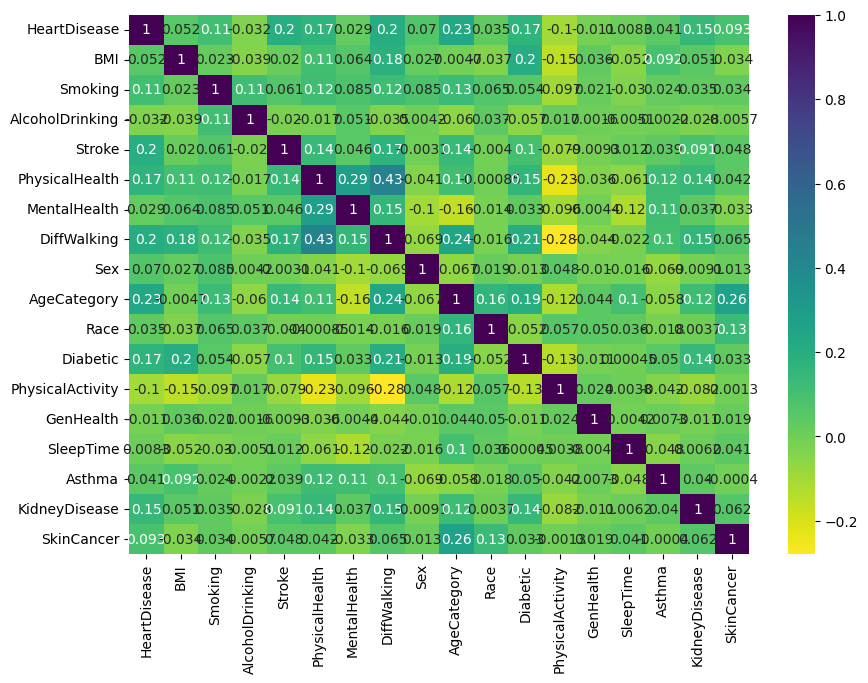

In [144]:
# calculate correlation between features by creating heatmap
#  -1 signifies zero correlation, while 1 signifies a perfect correlation.

correlation = heart.corr()

plt.figure(figsize=(10,7))
corr_map = sns.heatmap(correlation, annot=True, cmap="viridis_r")


In [145]:
# Implement Random Forest for Classification

# import package for random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#import warnings
#warnings.filterwarnings('ignore')

In [146]:
###############################################
# split the data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)


In [147]:
# after spliting data into training and testing sets, see the code in decision trees

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=30, random_state=25)


In [148]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [149]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

report = classification_report(y_test, y_pred)
print(report)



0.9023139462163853
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29112
           1       0.37      0.12      0.19      2868

    accuracy                           0.90     31980
   macro avg       0.64      0.55      0.57     31980
weighted avg       0.87      0.90      0.88     31980

